In [23]:
pip install SimHei

ERROR: Could not find a version that satisfies the requirement SimHei (from versions: none)
ERROR: No matching distribution found for SimHei
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

  首先构造一个含有集群和离群点的数据集。该数据集包含两个密度不同的正态分布集群和一些离群点。但是，这里我们手工对数据点的标注其实是不准确的，可能有一些随机点会散落在集群内部，而一些集群点由于正态分布的特性，会与其余点的距离相对远一些。在这里我们无法进行区分，所以按照生成方式统一将它们标记为“集群内部的点”或者“离群点”。

In [9]:
np.random.seed(61)

# 构造两个数据点集群
X_inliers1 = 0.2 * np.random.randn(100, 2)
X_inliers2 = 0.5 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers1 + 2, X_inliers2 - 2]

# 构造一些离群的点
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# 拼成训练集
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
# 打标签，群内点构造离群值为1，离群点构造离群值为-1
ground_truth[-n_outliers:] = -1

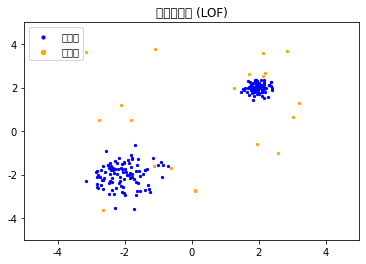

In [11]:
plt.title('构造数据集 (LOF)')
plt.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], color='b', s=5, label='集群点')
plt.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], color='orange', s=5, label='离群点')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

然后使用LocalOutlierFactor库对构造数据集进行训练，得到训练的标签和训练分数（局部离群值）。为了便于图形化展示，这里对训练分数进行了一些转换。

In [19]:
# 训练模型（找出每个数据的实际离群值）
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# 对单个数据集进行无监督检测时，以1和-1分别表示非离群点与离群点
y_pred = clf.fit_predict(X)
print(y_pred)

# 找出构造离群值与实际离群值不同的点
n_errors = y_pred != ground_truth
X_pred = np.c_[X,n_errors]

X_scores = clf.negative_outlier_factor_
# 实际离群值有正有负，转化为正数并保留其差异性（不是直接取绝对值）
X_scores_nor = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
X_pred = np.c_[X_pred,X_scores_nor]
X_pred = pd.DataFrame(X_pred,columns=['x','y','pred','scores'])

X_pred_same = X_pred[X_pred['pred'] == False]
X_pred_different = X_pred[X_pred['pred'] == True]

# 直观地看一看数据
X_pred

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1]


,x,y,pred,scores
0,1.913701,2.087875,0.0,0.000494
1,1.999748,2.212225,0.0,0.005255
2,2.040673,2.133115,0.0,0.001521
3,1.791277,1.743218,0.0,0.015652
4,1.991693,1.770405,0.0,0.010113
5,1.974831,2.204030,0.0,0.005188
6,2.205924,1.986534,0.0,0.022802
7,1.880050,2.048036,0.0,0.002938
8,1.558993,1.886954,0.0,0.044276
9,2.308499,2.136235,0.0,0.034563


### Numpy 备注
np.r_是按列连接两个矩阵，就是把两矩阵上下相加，要求列数相等。
np.c_是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等。

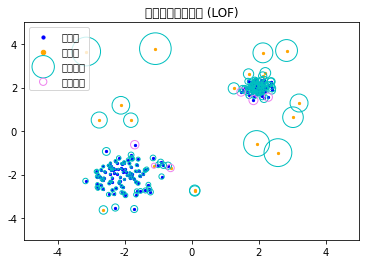

In [22]:
plt.title('局部离群因子检测 (LOF)')
plt.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], color='b', s=5, label='集群点')
plt.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], color='orange', s=5, label='离群点')

# 以标准化之后的局部离群值为半径画圆，以圆的大小直观表示出每个数据点的离群程度
plt.scatter(X_pred_same.values[:,0], X_pred_same.values[:, 1], 
            s=1000 * X_pred_same.values[:, 3], edgecolors='c', 
            facecolors='none', label='标签一致')
plt.scatter(X_pred_different.values[:, 0], X_pred_different.values[:, 1], 
            s=1000 * X_pred_different.values[:, 3], edgecolors='violet', 
            facecolors='none', label='标签不同')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))

legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [24]:
import pyod
from pyod.models.hbos import HBOS
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize